Accuracy: 0.15

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.25      0.21         8
           1       0.00      0.00      0.00         7
           2       0.20      0.20      0.20         5

    accuracy                           0.15        20
   macro avg       0.13      0.15      0.14        20
weighted avg       0.12      0.15      0.13        20



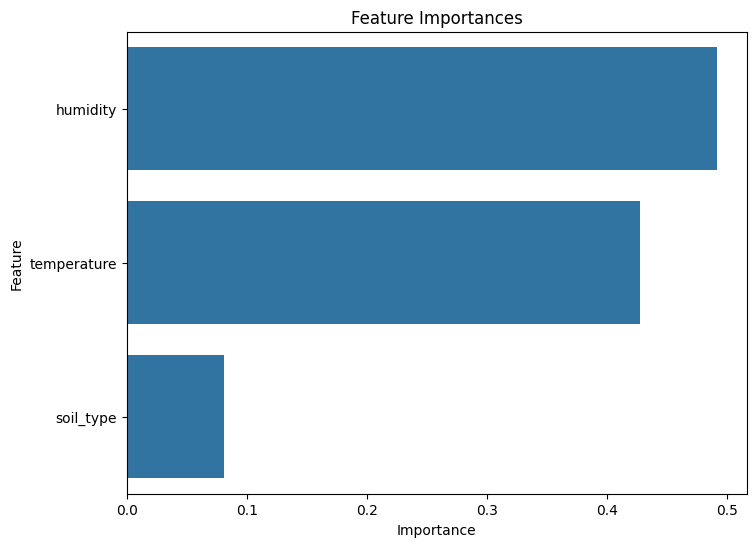

Predicted Moisture Level: low


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Simulated or Replace with your actual data)
# Dataset should have columns like: temperature, humidity, soil_type, moisture_level
# moisture_level is the target variable
data = {
    "temperature": np.random.uniform(20, 35, 100),
    "humidity": np.random.uniform(30, 70, 100),
    "soil_type": np.random.choice(["sandy", "clay", "loamy"], 100),
    "moisture_level": np.random.choice(["low", "medium", "high"], 100),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df["soil_type"] = df["soil_type"].map({"sandy": 0, "clay": 1, "loamy": 2})
df["moisture_level"] = df["moisture_level"].map({"low": 0, "medium": 1, "high": 2})

# Features and target
X = df[["temperature", "humidity", "soil_type"]]
y = df["moisture_level"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances")
plt.show()

# Predict moisture level for new data
new_data = pd.DataFrame({
    "temperature": [25],
    "humidity": [55],
    "soil_type": [0],  # sandy soil
})

predicted_moisture = model.predict(new_data)
moisture_levels = {0: "low", 1: "medium", 2: "high"}
print("Predicted Moisture Level:", moisture_levels[predicted_moisture[0]])


Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.27      0.23        11
           1       0.31      0.36      0.33        11
           2       0.42      0.28      0.33        18

    accuracy                           0.30        40
   macro avg       0.31      0.30      0.30        40
weighted avg       0.33      0.30      0.31        40



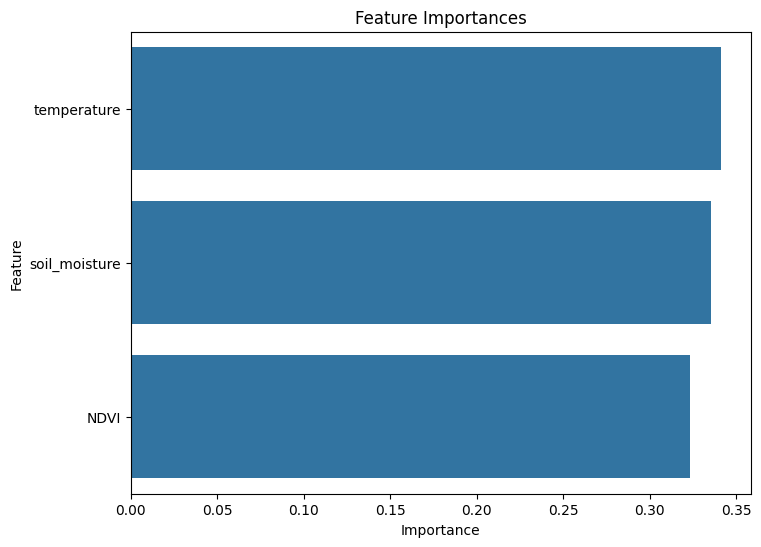

Predicted Crop Health: healthy


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset (Replace with actual data extracted from satellite imagery)
# Columns: NDVI, soil_moisture, temperature, crop_health (target)
data = {
    "NDVI": np.random.uniform(0.2, 0.9, 200),  # NDVI values between 0 (poor) and 1 (healthy vegetation)
    "soil_moisture": np.random.uniform(0.1, 0.5, 200),  # Soil moisture levels
    "temperature": np.random.uniform(15, 35, 200),  # Temperature in degrees Celsius
    "crop_health": np.random.choice(["healthy", "stressed", "unhealthy"], 200),  # Target labels
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical target variable
df["crop_health"] = df["crop_health"].map({"healthy": 0, "stressed": 1, "unhealthy": 2})

# Features and target variable
X = df[["NDVI", "soil_moisture", "temperature"]]
y = df["crop_health"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance analysis
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances")
plt.show()

# Predict crop health for new data
new_data = pd.DataFrame({
    "NDVI": [0.7],           # High NDVI value
    "soil_moisture": [0.3],  # Moderate soil moisture
    "temperature": [28],     # Optimal temperature
})

predicted_health = model.predict(new_data)
health_labels = {0: "healthy", 1: "stressed", 2: "unhealthy"}
print("Predicted Crop Health:", health_labels[predicted_health[0]])
